# AdventureWorks customer segmentation
### Main objectives
After successful completion of the lab work students will be able to:
-	Build data mining models and assess its accuracy in Python
-	Apply these models for real life marketing campaigns
-	Analyze profitability of applying data mining results

### TASK LIST

1.	Build data mining model predicting bike buyers by analyzing historic customer purchasing data.
2.	Assess accuracy of the mining model and compare it with ideal model and random guess model
3.	Analyze probability thresholds that should be accepted in order to maximize profits of the direct marketing campaign.
4.	Select potential customers for a targeted direct mail marketing campaign

In this demo, you will see how to use the Python to:
- Clean a data source and prepare it for use in data modeling
- Partition a data source into training and testing data
- Build a data mining model
- Verify the overall accuracy of the data mining model
- Create and model a scenario using the data mining model
- Apply the scenario results to a separate data set

CONTEXT
You have a database of potential customers whom you can target
• You have costs associated with marketing each customers
• You know your margin for a successful sale  
• You have historical records for previous marketing campaig
CAMPAIGN
Your margin is 30$ for each sale  
You have costs associated with marketing: 
• 5000$ fixed costs for preparing marketing materials 
• Variable cost for each direct mail:  
    • 25$ if you need 0 to 1000 letters
    • 20$ if you need 1001 to 5000 letters
    • 15$ if you need 5001 or more letters  
From your previous campaign 48% targeted people converted to bike buyers 
PROBLEM
As a marketing director you want to plan a marketing campaign to maximize profits. How would you approach this task?

In [ ]:
# import pandas library
import pandas as pd

In [18]:
# read the data from excel source
potential_df = pd.read_excel('Historic Customer Data.xls', sheet_name='Potential Customers', index_col='CustomerKey')
historical_df = pd.read_excel('Historic Customer Data.xls', sheet_name='Historical Customers', index_col='CustomerKey')

In [19]:
# see the data and its structure
potential_df.head()

,First Name,Last Name,Birth Date,Marital Status,Gender,Email,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,,,,,
11000,Jon,Yang,1966-04-08,Married,Male,jon24@adventure-works.com,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40
11001,Eugene,Huang,1965-05-14,Single,Male,eugene10@adventure-works.com,60000,3,Bachelors,Professional,No,1,0-1 Miles,41
11002,Ruben,Torres,1965-08-12,Married,Male,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Yes,1,2-5 Miles,41
11003,Christy,Zhu,1968-02-15,Single,Female,christy12@adventure-works.com,70000,0,Bachelors,Professional,No,1,5-10 Miles,38
11004,Elizabeth,Johnson,1968-08-08,Single,Female,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Yes,4,1-2 Miles,38


In [20]:
historical_df.head()

,Birth Date,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,,
11000,1966-04-08,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,1965-05-14,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,1948-11-24,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,1979-10-09,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,1955-04-13,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [21]:
print(potential_df.shape)
print(historical_df.shape)

(18484, 14)
(5000, 12)


## Let's analyze historical data and clean it

In [22]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 11000 to 19723
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Birth Date       5000 non-null   datetime64[ns]
 1   Marital Status   5000 non-null   object        
 2   Gender           5000 non-null   object        
 3   Income           5000 non-null   int64         
 4   Children         5000 non-null   int64         
 5   Education        5000 non-null   object        
 6   Occupation       5000 non-null   object        
 7   HomeOwner        5000 non-null   object        
 8   Number of cars   5000 non-null   int64         
 9   CommuteDistance  5000 non-null   object        
 10  Age              5000 non-null   int64         
 11  BikeBuyer        5000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 507.8+ KB


In [23]:
historical_df.columns

Index(['Birth Date', 'Marital Status', 'Gender', 'Income', 'Children',
       'Education', 'Occupation', 'HomeOwner', 'Number of cars',
       'CommuteDistance', 'Age', 'BikeBuyer'],
      dtype='object')

In [24]:
potential_df.columns

Index(['First Name', 'Last Name', 'Birth Date', 'Marital Status', 'Gender',
       'Email', 'Income', 'Children', 'Education', 'Occupation', 'HomeOwner',
       'Number of cars', 'CommuteDistance', 'Age'],
      dtype='object')

In [25]:
# describe data statistics
historical_df.describe()

,Income,Children,Number of cars,Age
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,58214.000000,1.884200,1.510200,44.234400
std,32541.081549,1.632827,1.135145,11.300487
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,36.000000
50%,60000.000000,2.000000,2.000000,42.000000
75%,80000.000000,3.000000,2.000000,52.000000
max,170000.000000,12.000000,4.000000,95.000000


In [26]:
# find null items from dataset
historical_df.isnull().sum()

Birth Date         0
Marital Status     0
Gender             0
Income             0
Children           0
Education          0
Occupation         0
HomeOwner          0
Number of cars     0
CommuteDistance    0
Age                0
BikeBuyer          0
dtype: int64

In [27]:
# find duplicates 
historical_df.index[historical_df.index.duplicated()].nunique()

0

In [28]:
# Drop useless columns for preidctions. How do you think, 
# why we don't need birth date?
historical_df.drop('Birth Date', axis='columns', inplace=True)
potential_df.drop('Birth Date', axis='columns', inplace=True)
potential_df.drop('First Name', axis='columns', inplace=True)
potential_df.drop('Last Name', axis='columns', inplace=True)
potential_df.drop('Email', axis='columns', inplace=True)
print(potential_df.shape)
print(historical_df.shape)

(18484, 10)
(5000, 11)


In [29]:
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [30]:
potential_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41
11002,Married,Male,60000,3,Bachelors,Professional,Yes,1,2-5 Miles,41
11003,Single,Female,70000,0,Bachelors,Professional,No,1,5-10 Miles,38
11004,Single,Female,80000,5,Bachelors,Professional,Yes,4,1-2 Miles,38


In [31]:
# import libraries for plots
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [32]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(historical_df.shape[1]) / cols)
for i, column in enumerate(historical_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if historical_df.dtypes[column] == np.object:
        historical_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        historical_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

ValueError: Number of rows must be a positive integer, not 3.0

<Figure size 2500x1500 with 0 Axes>

In [ ]:
# choose categorical and continuous features from data

categorical_columns = [c for c in historical_df.columns 
                       if historical_df[c].dtype.name == 'object']
numerical_columns = [c for c in historical_df.columns 
                     if historical_df[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)
categorical_columns = categorical_columns[:-1]
print(categorical_columns)

categorical_columns: ['Marital Status', 'Gender', 'Education', 'Occupation', 'HomeOwner', 'CommuteDistance', 'BikeBuyer']
numerical_columns: ['Income', 'Children', 'Number of cars', 'Age']
['Marital Status', 'Gender', 'Education', 'Occupation', 'HomeOwner', 'CommuteDistance']


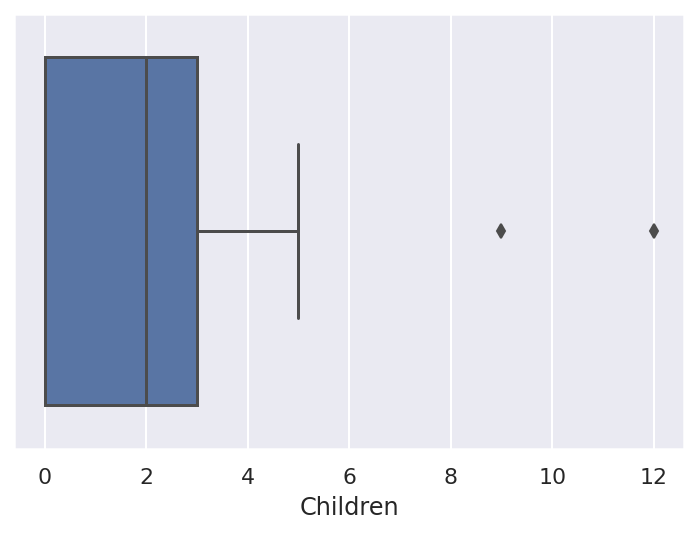

In [ ]:
sns.boxplot(x="Children", data=historical_df);

How the boxplot works:

<img src='boxplot.png'>

In [ ]:
historical_df['Children'].value_counts()

0     1357
2     1009
1      987
4      654
3      588
5      403
9        1
12       1
Name: Children, dtype: int64

In [ ]:
# clean outliers
historical_df = historical_df[historical_df['Children']<6]

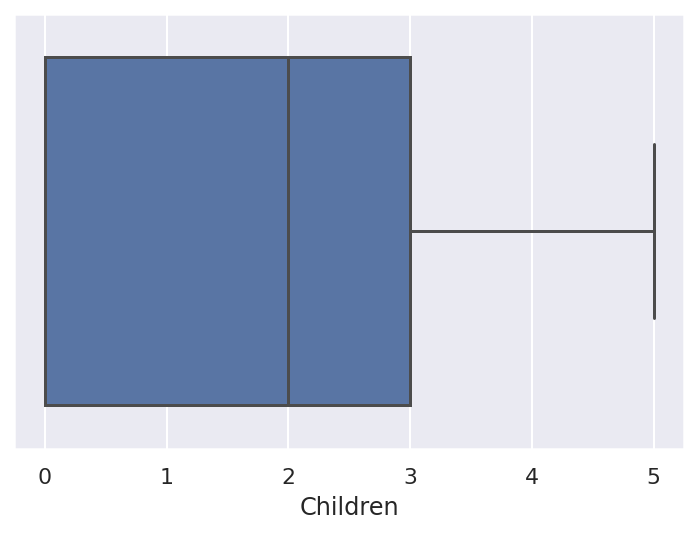

In [ ]:
sns.boxplot(x="Children", data=historical_df);

<AxesSubplot:xlabel='Age'>

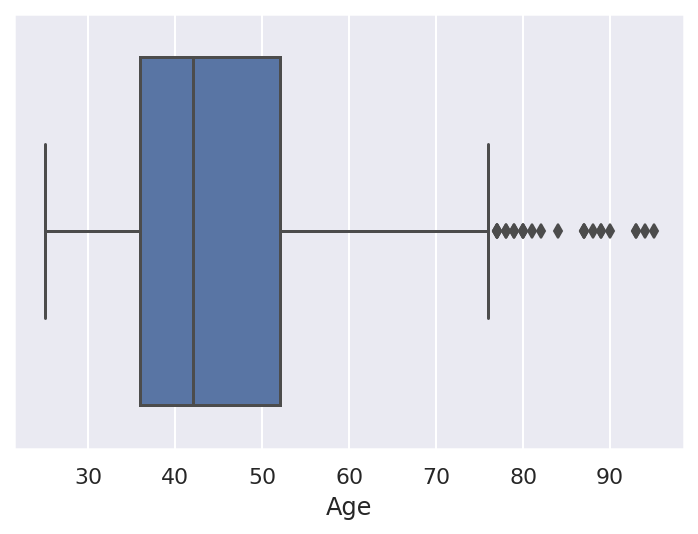

In [ ]:
# same action for age
sns.boxplot(x="Age", data=historical_df)

In [ ]:
# clean data for age column
historical_df = historical_df[historical_df['Age']<70]

<AxesSubplot:xlabel='Age'>

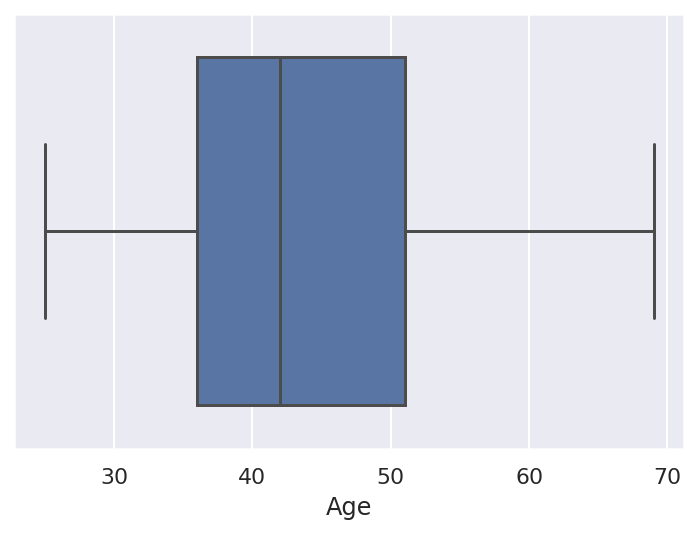

In [ ]:
sns.boxplot(x="Age", data=historical_df)

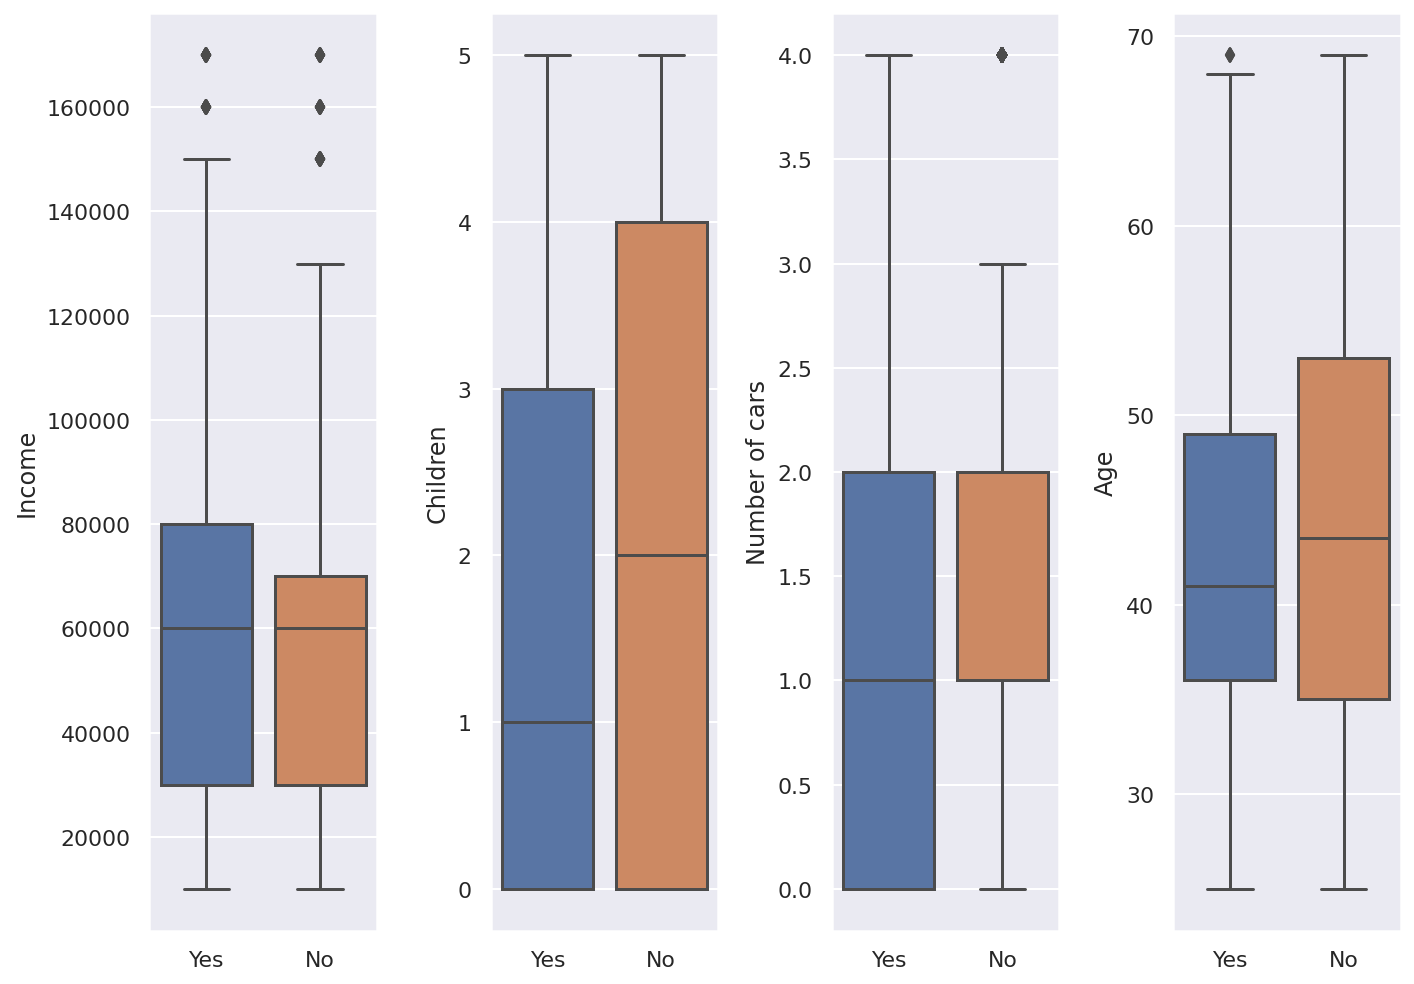

In [ ]:
# plot boxplots for some continious features
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical_columns):
    ax = axes[idx % 4]
    sns.boxplot(x="BikeBuyer", y=feat, data=historical_df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [ ]:
# find dependency between education and target variable using crosstables
pd.crosstab(historical_df["Education"], historical_df["BikeBuyer"]).T

Education,Bachelors,Graduate Degree,High School,Partial College,Partial High School
BikeBuyer,,,,,
No,637,393,525,652,273
Yes,837,442,357,648,133


<AxesSubplot:xlabel='Gender', ylabel='count'>

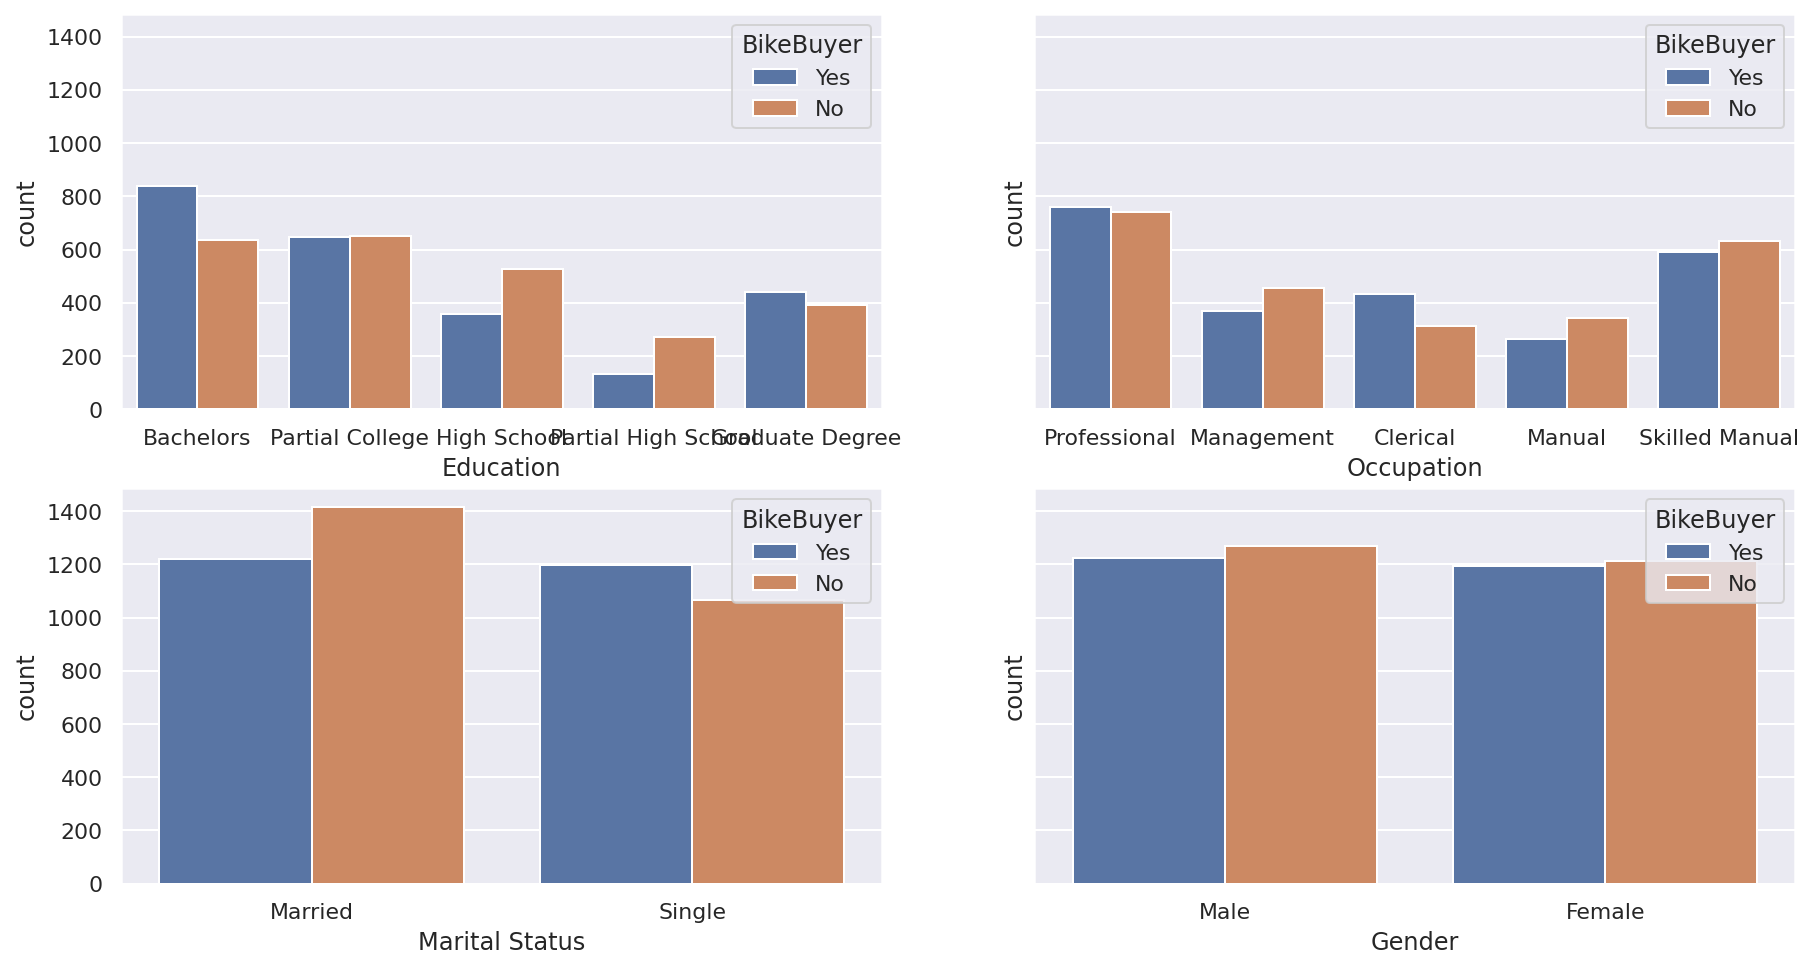

In [ ]:
# trying to find dependencies between target variable and some binary variables
_, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 8))

sns.countplot(x="Education", hue='BikeBuyer', data=historical_df,ax=axes[0][0])
sns.countplot(x="Occupation", hue='BikeBuyer', data=historical_df,ax=axes[0][1])
sns.countplot(x="Marital Status", hue='BikeBuyer', data=historical_df,ax=axes[1][0])
sns.countplot(x="Gender", hue='BikeBuyer', data=historical_df,ax=axes[1][1])


In [ ]:
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [ ]:
# convert yes/no string variables into numerical values
map_dict = {"No": 0, "Yes": 1}
historical_df['BikeBuyer'] = historical_df['BikeBuyer'].map(map_dict)
historical_df['HomeOwner'] = historical_df['HomeOwner'].map(map_dict)
potential_df['HomeOwner'] = potential_df['HomeOwner'].map(map_dict)
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,1,0,1-2 Miles,40,1
11001,Single,Male,60000,3,Bachelors,Professional,0,1,0-1 Miles,41,1
29004,Married,Male,70000,4,Bachelors,Management,1,2,10+ Miles,57,1
25562,Married,Female,20000,0,Bachelors,Clerical,1,0,0-1 Miles,27,1
18839,Married,Male,80000,3,Partial College,Professional,1,1,1-2 Miles,51,1


In [ ]:
potential_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,1,0,1-2 Miles,40
11001,Single,Male,60000,3,Bachelors,Professional,0,1,0-1 Miles,41
11002,Married,Male,60000,3,Bachelors,Professional,1,1,2-5 Miles,41
11003,Single,Female,70000,0,Bachelors,Professional,0,1,5-10 Miles,38
11004,Single,Female,80000,5,Bachelors,Professional,1,4,1-2 Miles,38


In [ ]:
historical_df.dtypes

Marital Status     object
Gender             object
Income              int64
Children            int64
Education          object
Occupation         object
HomeOwner           int64
Number of cars      int64
CommuteDistance    object
Age                 int64
BikeBuyer           int64
dtype: object

### Prepare data for machine learning

In [ ]:
# split dataset into X and y 
historical_y = historical_df['BikeBuyer'].astype('int')
historical_x = historical_df.drop('BikeBuyer', axis = 1)

In [ ]:
historical_x.shape

(4897, 10)

In [ ]:
potential_df.shape

(18484, 10)

In [ ]:
# fill missing data

for c in categorical_columns:
    if c in historical_x.columns:
        historical_x[c].fillna(historical_x[c].mode()[0], inplace=True)
    if c in potential_df.columns:
        potential_df[c].fillna(potential_df[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    if c in historical_x.columns:
        historical_x[c].fillna(historical_x[c].median(), inplace=True)
    if c in potential_df.columns:
        potential_df[c].fillna(potential_df[c].median(), inplace=True)

In [ ]:
# encoding variables for decision trees algorithms ex. one-hot-encoding
historical_x = pd.concat([historical_x[numerical_columns],
    pd.get_dummies(historical_x[categorical_columns])], axis=1)
potential_df = pd.concat([potential_df[numerical_columns],
    pd.get_dummies(potential_df[categorical_columns])], axis=1)

In [ ]:
historical_x.head()

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
11001,60000,3,1,41,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
29004,70000,4,2,57,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
25562,20000,0,0,27,1,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
18839,80000,3,1,51,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
potential_df.head()

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
11001,60000,3,1,41,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
11002,60000,3,1,41,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
11003,70000,0,1,38,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
11004,80000,5,4,38,1,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
historical_x.shape

(4897, 24)

In [ ]:
potential_df.shape

(18484, 24)

### Split data into training and testing datasets

In [ ]:
# split data into train and validation part
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(historical_x,historical_y,test_size=0.3, random_state=17)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Train Machine Learning (ML) model

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

### Analyze model results

In [ ]:
tree_predictions = tree.predict(X_valid)  
accuracy_score(y_valid, tree_predictions)

0.6238095238095238

In [ ]:
%%time
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(historical_x, historical_y)
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 8}
Best cross validaton score 0.7079925371578663
CPU times: user 440 ms, sys: 0 ns, total: 440 ms
Wall time: 440 ms


In [ ]:
tuned_tree = DecisionTreeClassifier(max_depth=8, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_valid)
accuracy_score(y_valid, tuned_tree_predictions)

0.6850340136054421

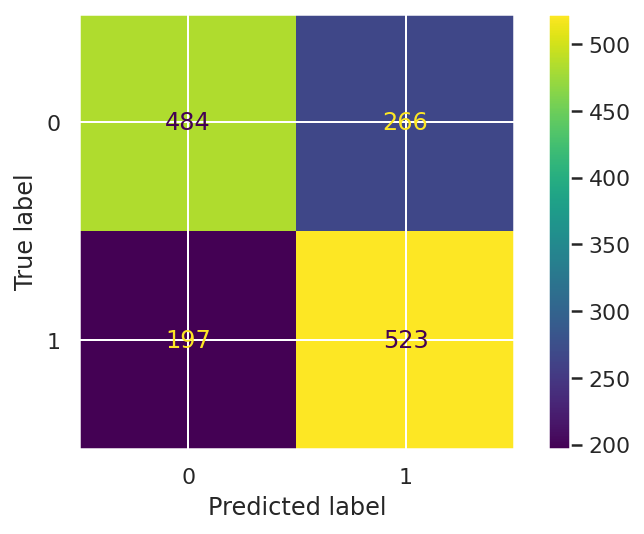

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, tuned_tree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(tuned_tree, out_file='bike_tree.dot',
                feature_names=X_train.columns, filled = True, max_depth=8)

In [ ]:
!dot -Tpng bike_tree.dot -o bike_tree.png

In [ ]:
!ls -l

total 10828
-rw-rw-r-- 1 jovyan users   34163 Oct  3 23:06  bike_tree.dot
-rw-rw-r-- 1 jovyan users 2193149 Oct  3 23:06  bike_tree.png
-rw-rw-r-- 1 jovyan users    5411 Oct  3 06:06  bike_tree_pruned.dot
-rw-rw-r-- 1 jovyan users  330307 Oct  3 06:06  bike_tree_pruned.png
-rw-rw-r-- 1 jovyan users   27664 Sep 21 13:47  boxplot.png
-rw-rw-r-- 1 jovyan users 5803520 Sep 21 13:47 'Historic Customer Data.xls'
-rw-r--r-- 1 jovyan users 1439906 Oct  3 22:59  lab3-argyropoulos.ipynb
-rw-rw-r-- 1 jovyan users 1240335 Oct  3 23:04  Lab3_Lukinskii.ipynb


<img src='bike_tree.png'>

In [ ]:
export_graphviz(tuned_tree, out_file='bike_tree_pruned.dot',
                feature_names=X_train.columns, filled = True, max_depth=4)
!dot -Tpng bike_tree_pruned.dot -o bike_tree_pruned.png

<img src='bike_tree_pruned.png'>

### Self-control stop 
- Which group of potential customers are most likely to buy a bike? Prove your answer with the screenshot.
- Which group of customers is least interesting to bike sellers? Prove your answer with the screenshot.

Looking at the bottom groups at the big picture, we can notice the one seeming the most promising:  
That's with the gini = 0.139, and division of 7/86. It's not the best gini, though, it's the biggest bikers/bikers+non-bikers proportion, so we'll stick with that.  
The final group will have these characteristics:  
- Doesn't have a car  
- Has less than 3 children  
- Has Bachelors or higher education  
- Income is more than 15k but less than 55k  
- Age is less than 49  
- Occupation clerical > 0.5  

Same goes for least promising group: it's with gini = 0.044, and division of 43/1.  
- Less than 1 car  
- More then 3 children  
- Older then 40  
- No clerical occupation  
- Commute distance less then 10 miles   
- Partial High School   
- No degree  
- Single  
<em>(Kind of a sad picture, to be honest)</em>

In [ ]:
#calculating tree probabilities
probs = tuned_tree.predict_proba(X_valid)
dec_paths = tuned_tree.decision_path(X_valid)
dec_paths

<1470x327 sparse matrix of type '<class 'numpy.int64'>'
	with 13022 stored elements in Compressed Sparse Row format>

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

def tree_get_leaf_size_for_elem(tree, feature_names):

    tree_ = tree.tree_

    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            recurse(tree_.children_left[node])
        else:
            samples_in_leaf = np.sum(tree_.value[node][0])

    recurse(0)

tree_get_leaf_size_for_elem(clf, feature_names)

NameError: name 'feature_names' is not defined

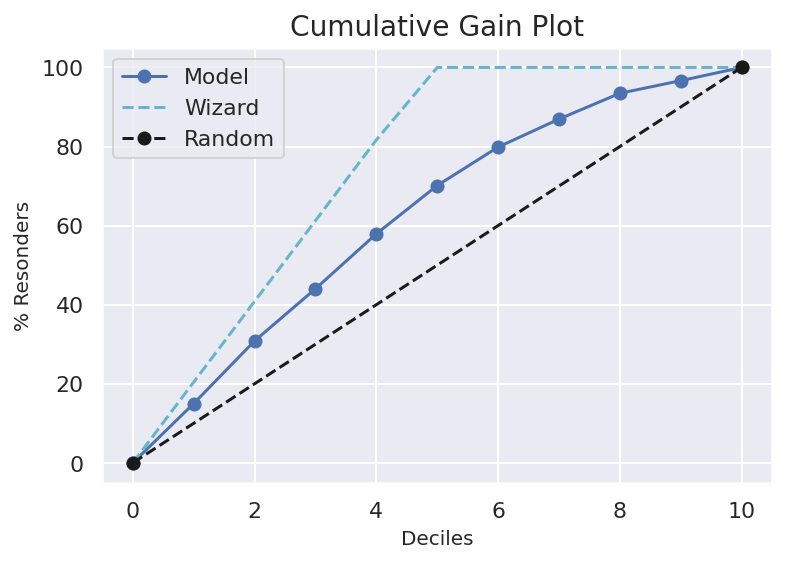

In [ ]:
# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_valid, probs[:,1])

### Self-control stop 
- Explain accuracy chart and meaning of the models, presented on it

Basically, it's our model (blue line with dots) compared to ideal 100%-accurate wizard model (which is not suitable for practice because of overfitting - like tailoring the model so close to our data, it becomes not applicable for other datasets), and to random model (coin-flip type).  
  
Generally, the closer our model is to wizard, the better. We can see, for example, that for 5th decile we are at 70%, whilst random model is at 50%, however our trained model does not predict a higher proportion of the target class in the validation subsample.

https://www.analyticsvidhya.com/blog/2021/09/how-to-evaluate-the-business-value-of-ml-model/

## Let's build a profit chart for our model

In [ ]:
potential_predictions = tuned_tree.predict(potential_df)
potential_probs = tuned_tree.predict_proba(potential_df)

In [ ]:
type(potential_predictions)

numpy.ndarray

In [ ]:
potential_predictions[1]

1

In [ ]:
potential_probs.shape

(18484, 2)

In [ ]:
potential_probs[0][1]

1.0

In [ ]:
potential_df['probability'] = potential_probs[:,1]

In [ ]:
potential_df['result'] = potential_predictions

In [ ]:
potential_df.sort_values(by = 'probability', ascending=False, inplace=True)

In [ ]:
potential_df['revenue'] = potential_df['probability']*30
potential_df.head()

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,probability,result,revenue
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1.0,1,30.0
18049,40000,4,2,45,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1.0,1,30.0
17932,30000,4,0,45,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1.0,1,30.0
17924,10000,1,0,28,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1.0,1,30.0
17923,10000,1,0,29,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1.0,1,30.0


In [ ]:
#c.f. context
def revenue_builder(potenti_df,item_revenue):
    base_cost = -5000 
    target_population = len(potenti_df)
    costs0_1000 = -25
    costs1001_5000 = -20
    costs_more_5000 = -15  
    potential_df['revenue'] = potential_df['probability']*item_revenue
    model_points = [] 
    no_model_points = []
    Extremums = {}
    switch = False

    for i in range(len(potential_df)):
        unit_cost = 0
        if i < 1001: 
            unit_cost = costs0_1000
        elif i < 5001:
            unit_cost = costs1001_5000
        else : 
            unit_cost = costs_more_5000
        revenue = potential_df['revenue'].iloc[:i].sum() 
    #print(revenue)
        model_result = base_cost + unit_cost*i +revenue
    
    # Simplistic way to display peaks by turning the binary swich
        if i > 1 and model_result < model_points[-1] and not switch:
            switch = True
            #print('Breakpoint: ',i)
            Extremums[model_result] = i
        elif i > 1 and model_result > model_points[-1] and switch:
            switch = False
        
        model_points.append(model_result)
    print('Highest point: ',Extremums[max(Extremums)])
    print('Highest revenue: ',round(max(Extremums),2))
    print('Percentage of the population: ',round(Extremums[max(Extremums)]/len(potential_df)*100,2),'%')
    plt.plot(model_points)

    plt.plot(no_model_points)
    plt.show()    
    
    

Highest point:  9987
Highest revenue:  64365.55
Percentage of the population:  54.03 %


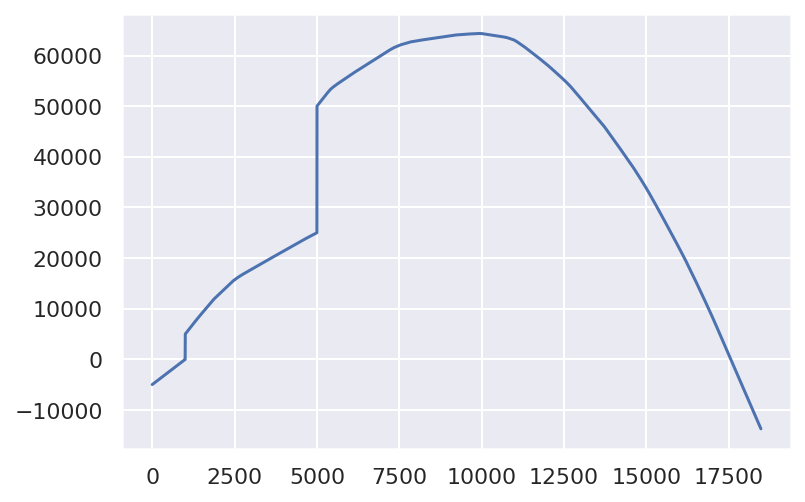

In [ ]:
revenue_builder(potential_df,30)

Highest point:  10981
Highest revenue:  101911.66
Percentage of the population:  59.41 %


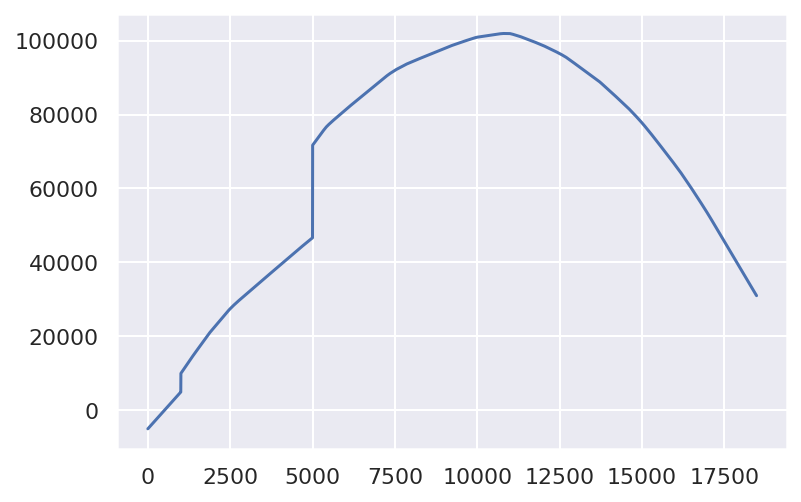

In [ ]:
revenue_builder(potential_df,35)

Highest point:  7323
Highest revenue:  32130.6
Percentage of the population:  39.62 %


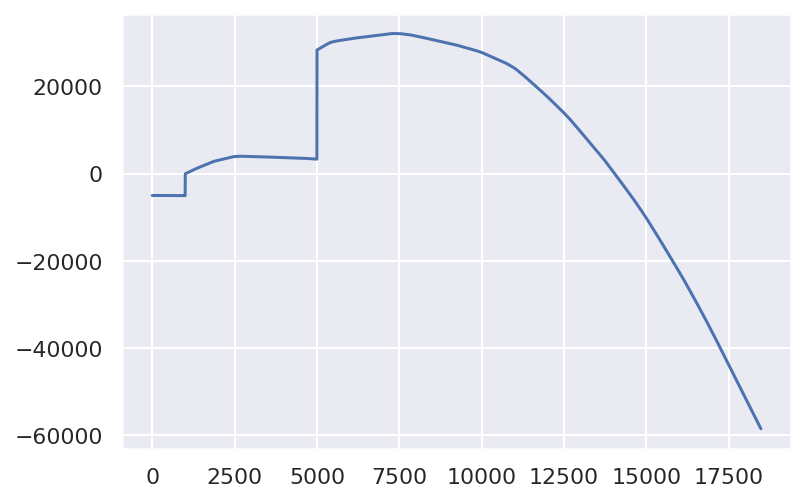

In [ ]:
revenue_builder(potential_df,25)

In [ ]:
dic = {1:1,2:1,3:5}
max(dic)

3

In [ ]:
target_population

18484

### Self-control stops

- What percentage of population should be targeted with our direct mail marketing campaign?

Highest point is at approx. 9987, si it's 54%.

- What happens if we increase revenue per individual to 35 (decrease to 25)?

If we decrease to 25, 7323 will be at the highest point, so 39.6%

If we increase to 35, 10981, 59.4%

## In-class discussions

-	What have you learned?
-	Describe the steps of the typical data mining process based on the lab and why they’re needed.
-	Why do you need a test dataset?
-	What are the main challenges in implementing data mining in practice?
-	What to do if you don’t have historical data?
-	Make a guess about how decision trees work.
-	How you can apply new knowledge in planning marketing campaigns?
